## Similarity models: KNN classifiers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

### K Nearest Neighbors Classifiers

learning via probability (naive Bayes) and 
learning via errors (regression). 

Here we'll cover learning via similarity. 
This means we look for the datapoints that are most similar to the observation we are trying to predict.

Let's start by the simplest example: Nearest Neighbor.

**Nearest Neighbor**

Let's use this example: classifying a song as either "rock" or "jazz". For this data we have measures of duration in seconds and loudness in loudness units (we're not going to be using decibels since that isn't a linear measure, which would create some problems we'll get into later).


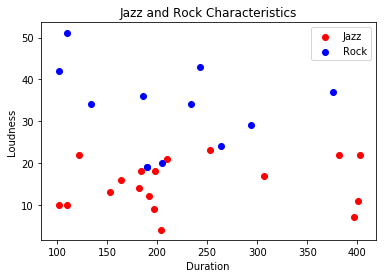

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

The simplest form of a similarity model is the **Nearest Neighbor model.** This works quite simply: when trying to predict an observation, we find the closest (or _nearest_) known observation in our training data and use that value to make our prediction. Here we'll use the **model as a classifier, the outcome of interest will be a category.**

To find which observation is "nearest" we need some kind of **way to measure distance**. Typically we use **_Euclidean distance_**, the standard distance measure that you're familiar with from geometry. With one observation in n-dimensions (𝑥1,𝑥2,...,𝑥𝑛)
and the other (𝑤1,𝑤2,...,𝑤𝑛):

⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√ (𝑥1−𝑤1)2 + (𝑥2−𝑤2)2 +...+(𝑥𝑛−𝑤𝑛)2

You might recognize this formula, (taking distances, squaring them, adding the squares together, and taking the root) as a generalization of the **Pythagorean theorem into n-dimensions**. You can technically define any distance measure you want, and there are times where this customization may be valuable. As a **general standard, however, we'll use Euclidean distance.**

Now that we have a distance measure from each point in our training data to the point we're trying to predict the model can find the datapoint with the smallest distance and then apply that category to our prediction.

Let's try running this model, using the SKLearn package.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0], dtype=int64)

It's as simple as that. Looks like our model is predicting that 24 loudness, 190 second long song is not jazz. All it takes to train the model is a dataframe of independent variables and a dataframe of dependent outcomes.

You'll note that for this example, we used the *KNeighborsClassifier* method from SKLearn. This is because Nearest Neighbor is a simplification of K-Nearest Neighbors. The jump, however, isn't that far.

**K-Nearest Neighbors**

K-Nearest Neighbors (or "KNN") is the logical extension of Nearest Neighbor. **Instead of looking at just the single nearest datapoint to predict an outcome, we look at several of the nearest neighbors, with 𝑘 representing the number of neighbors we choose to look at**. Each of the 𝑘 neighbors gets to vote on what the predicted outcome should be.

This does a **couple of valuable things. Firstly, it smooths out the predictions. If only one neighbor** gets to influence the outcome, the **model explicitly overfits to the training data**. Any **single outlier can create pockets of one category prediction** surrounded by a sea of the other category.

This also means **instead of just predicting classes, we get implicit probabilities**. If each of the 𝑘 neighbors gets a vote on the outcome, then the probability of the test example being from any given class 𝑖 is:

𝑣𝑜𝑡𝑒𝑠𝑖/𝑘

And this applies for all classes present in the training set. Our example only has two classes, but this model can accommodate as many classes as the data set necessitates. To come up with a classifier prediction it simply takes the class for which that fraction is maximized.

Let's expand our initial nearest neighbors model from above to a KNN with a 𝑘
of 5.

In [4]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


Now our test prediction has changed. In using the five nearest neighbors it appears that there were two votes for rock and three for jazz, so it was classified as a jazz song. This is different than our simpler Nearest Neighbors model. While the closest observation was in fact rock, there are more jazz songs in the nearest 𝑘 neighbors than rock.

We can **visualize our decision bounds with something called a mesh.** This **allows us to generate a prediction over the whole space**. Read the code below and make sure you can pull out what the individual lines do, consulting the documentation for unfamiliar methods if necessary.

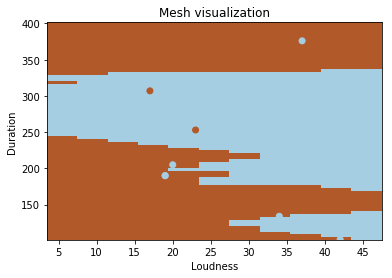

In [5]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Looking at the visualization above, any new point that fell within a blue area would be predicted to be jazz, and any point that fell within a brown area would be predicted to be rock.

The boundaries above are strangely jagged here, and we'll get into that in more detail in the next lesson.

Also note that the visualization isn't completely continuous. There are an infinite number of points in this space, and we can't calculate the value for each one. That's where the mesh comes in. **We set our mesh size (h = 4.0) to 4.0 above, which means we calculate the value for each point in a grid where the points are spaced 4.0 away from each other.**

You **can make the mesh size smaller to get a more continuous visualization, but at the cost of a more computationally demanding calculation.** In the cell below, recreate the plot above with a mesh size of 10.0. Then reduce the mesh size until you get a plot that looks good but still renders in a reasonable amount of time. When do you get a visualization that looks acceptably continuous? When do you start to get a noticeable delay?


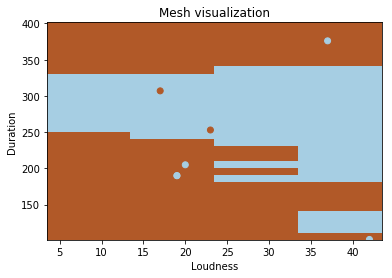

In [7]:
# Play with different mesh sizes here.

# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 10.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

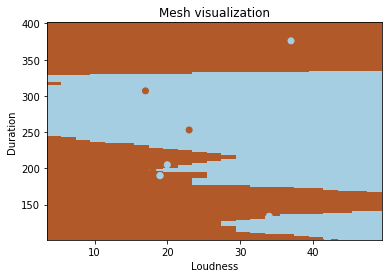

In [9]:
# Play with different mesh sizes here.

# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 2.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

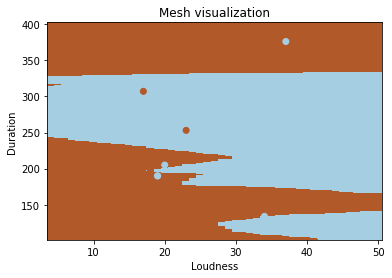

In [10]:
# Play with different mesh sizes here.

# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 1.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Now you've built a KNN model!

Challenge: Implement the Nearest Neighbor algorithm

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.


Ball tree methods from sklearn.neighbors
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html

In [ ]:
#Query for k-nearest neighbors
>>> import numpy as np
>>> rng = np.random.RandomState(0)
>>> X = rng.random_sample((10, 3))  # 10 points in 3 dimensions
>>> tree = BallTree(X, leaf_size=2)              
>>> dist, ind = tree.query(X[:1], k=3)                
>>> print(ind)  # indices of 3 closest neighbors
[0 3 1]
>>> print(dist)  # distances to 3 closest neighbors
[ 0.          0.19662693  0.29473397]

In [ ]:
#Pickle and Unpickle a tree. Note that the state of the tree is 
#saved in the pickle operation: the tree needs not be rebuilt 
#upon unpickling.

>>> import pickle
>>> rng = np.random.RandomState(0)
>>> X = rng.random_sample((10, 3))  # 10 points in 3 dimensions
>>> tree = BallTree(X, leaf_size=2)        
>>> s = pickle.dumps(tree)                     
>>> tree_copy = pickle.loads(s)                
>>> dist, ind = tree_copy.query(X[:1], k=3)     
>>> print(ind)  # indices of 3 closest neighbors
[0 3 1]
>>> print(dist)  # distances to 3 closest neighbors
[ 0.          0.19662693  0.29473397]

In [ ]:
#Query for neighbors within a given radius
>>> rng = np.random.RandomState(0)
>>> X = rng.random_sample((10, 3))  # 10 points in 3 dimensions
>>> tree = BallTree(X, leaf_size=2)     
>>> print(tree.query_radius(X[:1], r=0.3, count_only=True))
3
>>> ind = tree.query_radius(X[:1], r=0.3)  
>>> print(ind)  # indices of neighbors within distance 0.3
[3 0 1]

In [ ]:
#Compute a gaussian kernel density estimate:
>>> import numpy as np
>>> rng = np.random.RandomState(42)
>>> X = rng.random_sample((100, 3))
>>> tree = BallTree(X)                
>>> tree.kernel_density(X[:3], h=0.1, kernel='gaussian')
array([ 6.94114649,  7.83281226,  7.2071716 ])

In [ ]:
#Compute a two-point auto-correlation function
>>> import numpy as np
>>> rng = np.random.RandomState(0)
>>> X = rng.random_sample((30, 3))
>>> r = np.linspace(0, 1, 5)
>>> tree = BallTree(X)                
>>> tree.two_point_correlation(X, r)
array([ 30,  62, 278, 580, 820])

In [ ]:
>>> import numpy as np
>>> rng = np.random.RandomState(0)
>>> X = rng.random_sample((30, 3))
>>> r = np.linspace(0, 1, 5)
>>> tree = BallTree(X)                
>>> tree.two_point_correlation(X, r)
array([ 30,  62, 278, 580, 820])

https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55

K-Nearest Neighbors, or KNN for short, is one of the simplest machine learning algorithms and is used in a wide array of institutions. KNN is a non-parametric, lazy learning algorithm. When we say a technique is non-parametric, it means that it does not make any assumptions about the underlying data. In other words, it makes its selection based off of the proximity to other data points regardless of what feature the numerical values represent. Being a lazy learning algorithm implies that there is little to no training phase. Therefore, we can immediately classify new data points as they present themselves.

Algorithm

1. Pick a value for K (i.e. 5).
2. Take the K nearest neighbors of the new data point according to their Euclidean distance.
3. Among these neighbors, count the number of data points in each category and assign the new data point to the category where you counted the most neighbors.

https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

Discover how to code ML algorithms from scratch including kNN, decision trees, neural nets, ensembles and much more in my new book, with full Python code and no fancy libraries.

k-Nearest Neighbors

The k-Nearest Neighbors algorithm or KNN for short is a very simple technique.

The entire training dataset is stored. When a prediction is required, the k-most similar records to a new record from the training dataset are then located. From these neighbors, a summarized prediction is made.

Similarity between records can be measured many different ways. A problem or data-specific method can be used. Generally, with tabular data, a good starting point is the Euclidean distance.

Once the neighbors are discovered, the summary prediction can be made by returning the most common outcome or taking the average. As such, KNN can be used for classification or regression problems.

There is no model to speak of other than holding the entire training dataset. Because no work is done until a prediction is required, KNN is often referred to as a lazy learning method.

k-Nearest Neighbors (in 3 easy steps)

First we will develop each piece of the algorithm in this section, then we will tie all of the elements together into a working implementation applied to a real dataset in the next section.

This k-Nearest Neighbors tutorial is broken down into 3 parts:

    Step 1: Calculate Euclidean Distance.
    Step 2: Get Nearest Neighbors.
    Step 3: Make Predictions.

These steps will teach you the fundamentals of implementing and applying the k-Nearest Neighbors algorithm for classification and regression predictive modeling problems.



Step 1: Calculate Euclidean Distance

The first step is to calculate the distance between two rows in a dataset.

Rows of data are mostly made up of numbers and an easy way to calculate the distance between two rows or vectors of numbers is to draw a straight line. This makes sense in 2D or 3D and scales nicely to higher dimensions.

We can calculate the straight line distance between two vectors using the **Euclidean distance measure.** It is calculated as the **square root of the sum of the squared differences between the two vectors.**

    Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)

Where x1 is the first row of data, x2 is the second row of data and i is the index to a specific column as we sum across all columns.

With Euclidean distance, the smaller the value, the more similar two records will be. A value of 0 means that there is no difference between two records.

Below is a function named euclidean_distance() that implements this in Python.

In [ ]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

You can see that the function assumes that the last column in each row is an output value which is ignored from the distance calculation.

We can test this distance function with a small contrived classification dataset. We will use this dataset a few times as we construct the elements needed for the KNN algorithm.

X1						X2							Y
2.7810836			2.550537003			0
1.465489372		2.362125076			0
3.396561688		4.400293529			0
1.38807019		1.850220317			0
3.06407232		3.005305973			0
7.627531214		2.759262235			1
5.332441248		2.088626775			1
6.922596716		1.77106367			1
8.675418651		-0.242068655		1
7.673756466		3.508563011			1

Putting this all together, we can write a small example to test our distance function by printing the distance between the first row and all other rows. We would expect the distance between the first row and itself to be 0, a good thing to look out for.

The full example is listed below.

In [ ]:
# Example of calculating Euclidean distance
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 
# Test distance function
dataset = [[2.7810836,2.550537003,0],
           [1.465489372,2.362125076,0],
           [3.396561688,4.400293529,0],
           [1.38807019,1.850220317,0],
           [3.06407232,3.005305973,0],
           [7.627531214,2.759262235,1],
           [5.332441248,2.088626775,1],
           [6.922596716,1.77106367,1],
           [8.675418651,-0.242068655,1],
           [7.673756466,3.508563011,1]]
row0 = dataset[0]

for row in dataset:
    distance = euclidean_distance(row0, row)
    print(distance)

Running this example prints the distances between the first row and every row in the dataset, including itself.

Step 2: Get Nearest Neighbors

Neighbors for a new piece of data in the dataset are the k closest instances, as defined by our distance measure.

To locate the neighbors for a new piece of data within a dataset we must first calculate the distance between each record in the dataset to the new piece of data. We can do this using our distance function prepared above.

Once distances are calculated, we must sort all of the records in the training dataset by their distance to the new data. We can then select the top k to return as the most similar neighbors.

We can do this by keeping track of the distance for each record in the dataset as a tuple, sort the list of tuples by the distance (in descending order) and then retrieve the neighbors.

Below is a function named get_neighbors() that implements this.

In [ ]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
        return neighbors

You can see that the euclidean_distance() function developed in the previous step is used to calculate the distance between each train_row and the new test_row.

The list of train_row and distance tuples is sorted where a custom key is used ensuring that the second item in the tuple (tup[1]) is used in the sorting operation.

Finally, a list of the num_neighbors most similar neighbors to test_row is returned.

We can test this function with the small contrived dataset prepared in the previous section.

The complete example is listed below.

In [ ]:
# Example of getting neighbors for an instance
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
# Test distance function
dataset = [[2.7810836,2.550537003,0], 
           [1.465489372,2.362125076,0],
           [3.396561688,4.400293529,0],
           [1.38807019,1.850220317,0],
           [3.06407232,3.005305973,0],
           [7.627531214,2.759262235,1],
           [5.332441248,2.088626775,1],
           [6.922596716,1.77106367,1],
           [8.675418651,-0.242068655,1],
           [7.673756466,3.508563011,1]]
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
    print(neighbor)

Running this example prints the 3 most similar records in the dataset to the first record, in order of similarity.

As expected, the first record is the most similar to itself and is at the top of the list.

Now that we know how to get neighbors from the dataset, we can use them to make predictions.

Step 3: Make Predictions

The most similar neighbors collected from the training dataset can be used to make predictions.

In the case of classification, we can return the most represented class among the neighbors.

We can achieve this by performing the max() function on the list of output values from the neighbors. Given a list of class values observed in the neighbors, the max() function takes a set of unique class values and calls the count on the list of class values for each class value in the set.

Below is the function named predict_classification() that implements this.

In [ ]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

We can test this function on the above contrived dataset.

Below is a complete example.

In [ ]:
# Example of making predictions
from math import sqrt

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
     for i in range(num_neighbors):
            neighbors.append(distances[i][0])
        return neighbors

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# Test distance function
dataset = [[2.7810836,2.550537003,0],
           [1.465489372,2.362125076,0],
           [3.396561688,4.400293529,0],
           [1.38807019,1.850220317,0],
           [3.06407232,3.005305973,0],
           [7.627531214,2.759262235,1],
           [5.332441248,2.088626775,1],
           [6.922596716,1.77106367,1],
           [8.675418651,-0.242068655,1],
           [7.673756466,3.508563011,1]]

prediction = predict_classification(dataset, dataset[0], 3)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))
